# Split waveguide
The split waveguide is a square waveguide that after a propagation distance $l_1$ splits in two square waveguides separated by an angle $\alpha$. After a distance $l_2$ the waveguides open up to vacuum.

In [1]:
from pypropagate import *

## Setting up the propagators
We create a settings object to store the propagator settings.

In [2]:
settings = presets.create_paraxial_wave_equation_settings()

We create a settings category that stores the paramters of the split waveguide. This allows a more flexible defintion routine as it allows us to change the paramters' values at any point. 

In [3]:
sw = settings.create_category('split_waveguide',short_name='SW')
sw.create_symbol('l_1',info='propagation length before split')
sw.create_symbol('l_2',info='propagation length after split')
sw.create_symbol('alpha',info='separation angle')
sw.create_symbol('d',info='waveguide profile edge length')
sw.create_symbol('n_core',info='refractive index in the guiding core')
sw.create_symbol('n_cladding',info='refractive index in the cladding');

Using these paramters we define the position depenent index of refraction.

In [4]:
s = settings.symbols

settings.wave_equation.n = pc.piecewise(
    (sw.n_core,(abs(s.x)<sw.d/2) & (abs(s.y)<sw.d/2) & (s.z <= sw.l_1)), # First part of the waveguide
    (sw.n_core,(abs(s.x - pc.tan(sw.alpha) * (s.z - sw.l_1) ) < sw.d/2) & (abs(s.y)<sw.d/2) & (s.z > sw.l_1)), # upper
    (sw.n_core,(abs(s.x + pc.tan(sw.alpha) * (s.z - sw.l_1) ) < sw.d/2) & (abs(s.y)<sw.d/2) & (s.z > sw.l_1)), # lower
    (sw.n_cladding,True) # cladding
)

settings.get(settings.wave_equation.n)

piecewise(tuple(n_core_SW,(abs(tan(alpha_SW)*(z-l_1_SW)+x)<d_SW/2&abs(y)<d_SW/2&l_1_SW<z)|(abs(x)<d_SW/2&abs(y)<d_SW/2&z<=l_1_SW)|(abs(x-tan(alpha_SW)*(z-l_1_SW))<d_SW/2&abs(y)<d_SW/2&l_1_SW<z)),tuple(n_cladding_SW,True))

## Numerical values
We now set all numerical paramter values for the simulation, including the simulation box size, boundary conditions and photon energy.

In [5]:
settings.simulation_box.set((1*units.um,0.3*units.um,1*units.mm),(2000,500,2000))

In [6]:
settings.wave_equation.set_energy(12*units.keV)
presets.set_plane_wave_initial_conditions(settings)

In [8]:
sw.n_core = 1
sw.n_cladding = presets.create_material('Ti',settings)
sw.l_1 = 0.2 * units.mm
sw.l_2 = 0.6 * units.mm
sw.d = 70 * units.nm
sw.alpha = 0.01 * units.degrees

In [9]:
settings.get_numeric(settings.wave_equation.n)

piecewise(tuple(1,(abs(tan(1/18e3*pi)*(z-m/5e3)+x)<m*7/2e8&abs(y)<m*7/2e8&m/5e3<z)|(abs(x)<m*7/2e8&abs(y)<m*7/2e8&z<=m/5e3)|(abs(x-tan(1/18e3*pi)*(z-m/5e3))<m*7/2e8&abs(y)<m*7/2e8&m/5e3<z)),tuple(n_Ti,True))

## Plotting $n(x,y,z)$
With all paramters defined we can visualize the index of refraction by creating cross-sections plots of the refraction index.

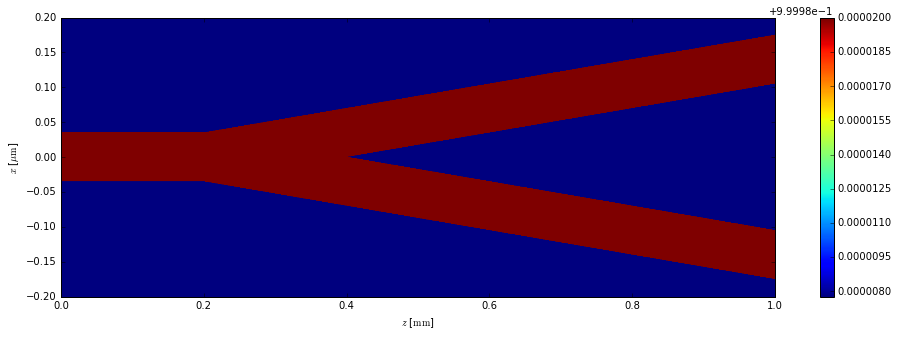

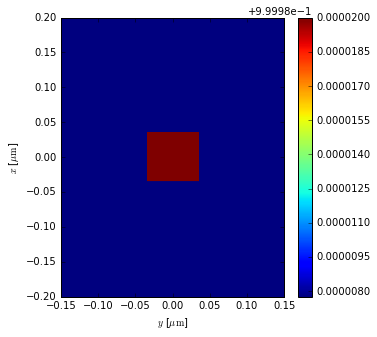

In [10]:
%matplotlib inline
plot(expression_to_field(settings.wave_equation.n.subs(s.y,0),settings)[-0.2*units.um:0.2*units.um],figsize=(16,5))
plot(expression_to_field(settings.wave_equation.n.subs(s.z,0),settings)[-0.2*units.um:0.2*units.um],figsize=(5,5))

## 2D Solution as preview
A quck 2D solution can act as a preview for the 3D result and and also acts as a verification if the simulation paramters are set properly.


Simulation running. Step 2000/2000: 100% [████████████████████████] [1.3 s] [eta 0s +- 0s]


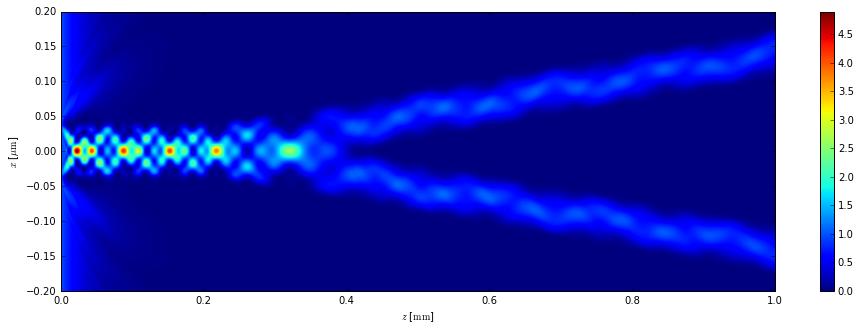

In [11]:
propagator = propagators.FiniteDifferencesPropagator1D(settings)
plot(propagator.run_slice()[-0.2*units.um:0.2*units.um],figsize=(16,5));

## Calculating the stationary solution
We use the 2D Finite Difference Prpagator to get the full stationary solution.


Simulation running. Step 2000/2000: 100% [██████████████████████] [484.2 s] [eta 0s +- 0s]


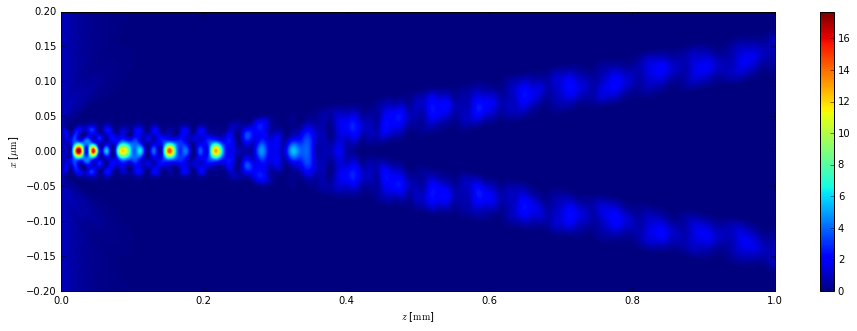

In [12]:
propagator = propagators.FiniteDifferencesPropagator2D(settings)
plot(propagator.run_slice()[-0.2*units.um:0.2*units.um,0],figsize=(16,5));

## Plotting the exit field
The field of the propagator is the field at $z = z_\text{max}$. We plot the field intensity at this point.

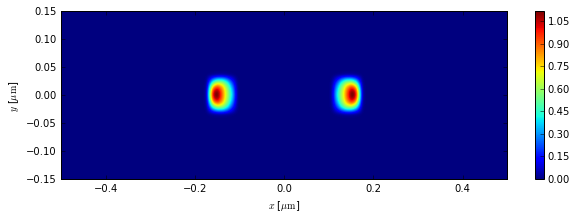

In [13]:
plot(propagator.get_field().transpose(),figsize=(10,3));